In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat Dataset Mobil Bekas (Agak Kompleks)
data_mobil = {
    'ID_Iklan': ['AD001', 'AD002', 'AD003', 'AD004', 'AD005', 'AD006', 'AD007', 'AD008'], # Noise
    'Merk': ['Toyota', 'Honda', 'Toyota', 'Suzuki', 'Honda', 'Mitsubishi', 'Toyota', 'Honda'], # Kategori
    'Tahun_Produksi': [2015, 2018, 2010, 2020, 2019, 2012, 2021, 2016],
    'Kilometer_Ribuan': [80, 40, 150, 20, 35, 120, 10, 75], # Makin tinggi harusnya makin murah
    'HP_Tenaga': [100, 120, 90, 105, 130, 180, 140, 110], # Horsepower
    'Tipe_Bahan_Bakar': ['Bensin', 'Bensin', 'Bensin', 'Bensin', 'Bensin', 'Diesel', 'Diesel', 'Bensin'], # Kategori
    'Transmisi': ['Manual', 'Matic', 'Manual', 'Manual', 'Matic', 'Manual', 'Matic', 'Matic'], # Kategori
    'Harga_Jual_Juta': [150, 220, 90, 180, 250, 280, 350, 170] # Target
}

df_mobil = pd.DataFrame(data_mobil)
df_mobil

,ID_Iklan,Merk,Tahun_Produksi,Kilometer_Ribuan,HP_Tenaga,Tipe_Bahan_Bakar,Transmisi,Harga_Jual_Juta
0,AD001,Toyota,2015,80,100,Bensin,Manual,150
1,AD002,Honda,2018,40,120,Bensin,Matic,220
2,AD003,Toyota,2010,150,90,Bensin,Manual,90
3,AD004,Suzuki,2020,20,105,Bensin,Manual,180
4,AD005,Honda,2019,35,130,Bensin,Matic,250
5,AD006,Mitsubishi,2012,120,180,Diesel,Manual,280
6,AD007,Toyota,2021,10,140,Diesel,Matic,350
7,AD008,Honda,2016,75,110,Bensin,Matic,170


In [109]:
df_mobil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_Iklan          8 non-null      object
 1   Merk              8 non-null      object
 2   Tahun_Produksi    8 non-null      int64 
 3   Kilometer_Ribuan  8 non-null      int64 
 4   HP_Tenaga         8 non-null      int64 
 5   Tipe_Bahan_Bakar  8 non-null      object
 6   Transmisi         8 non-null      object
 7   Harga_Jual_Juta   8 non-null      int64 
dtypes: int64(4), object(4)
memory usage: 640.0+ bytes


In [110]:
df_mobil.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

In [111]:
df_mobil

,ID_Iklan,Merk,Tahun_Produksi,Kilometer_Ribuan,HP_Tenaga,Tipe_Bahan_Bakar,Transmisi,Harga_Jual_Juta
0,AD001,Toyota,2015,80,100,Bensin,Manual,150
1,AD002,Honda,2018,40,120,Bensin,Matic,220
2,AD003,Toyota,2010,150,90,Bensin,Manual,90
3,AD004,Suzuki,2020,20,105,Bensin,Manual,180
4,AD005,Honda,2019,35,130,Bensin,Matic,250
5,AD006,Mitsubishi,2012,120,180,Diesel,Manual,280
6,AD007,Toyota,2021,10,140,Diesel,Matic,350
7,AD008,Honda,2016,75,110,Bensin,Matic,170


In [112]:
numeric = df_mobil.select_dtypes(['number']).columns

In [113]:
q1 = df_mobil[numeric].quantile(0.25)
q3 = df_mobil[numeric].quantile(0.75)
iqr = q3 - q1


lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
nonOutliers = ~((df_mobil[numeric] > upper) | (df_mobil[numeric] < lower)).any(axis=1)


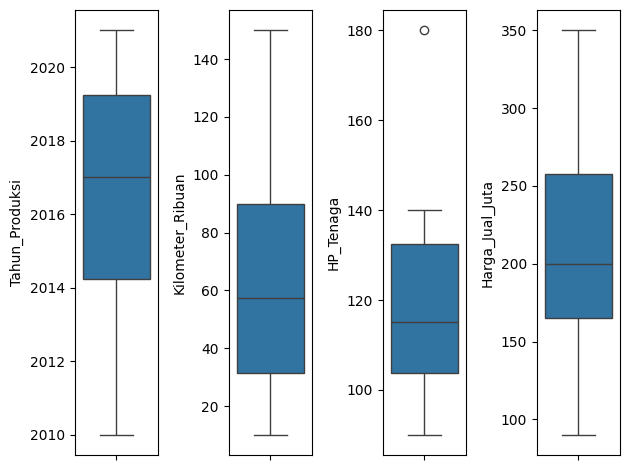

In [114]:
for i, col in enumerate(numeric):
    plt.subplot(1, len(numeric), i + 1)
    sns.boxplot(y = df_mobil[col])
    plt.tight_layout()

In [115]:
df_bersih = df_mobil.drop(columns=['ID_Iklan', 'Merk'])
df_bersih

,Tahun_Produksi,Kilometer_Ribuan,HP_Tenaga,Tipe_Bahan_Bakar,Transmisi,Harga_Jual_Juta
0,2015,80,100,Bensin,Manual,150
1,2018,40,120,Bensin,Matic,220
2,2010,150,90,Bensin,Manual,90
3,2020,20,105,Bensin,Manual,180
4,2019,35,130,Bensin,Matic,250
5,2012,120,180,Diesel,Manual,280
6,2021,10,140,Diesel,Matic,350
7,2016,75,110,Bensin,Matic,170


In [116]:
categorical = df_bersih.select_dtypes(['object']).columns
one_hot = pd.get_dummies(df_bersih, columns=categorical)


<Axes: >

<Figure size 1000x500 with 0 Axes>

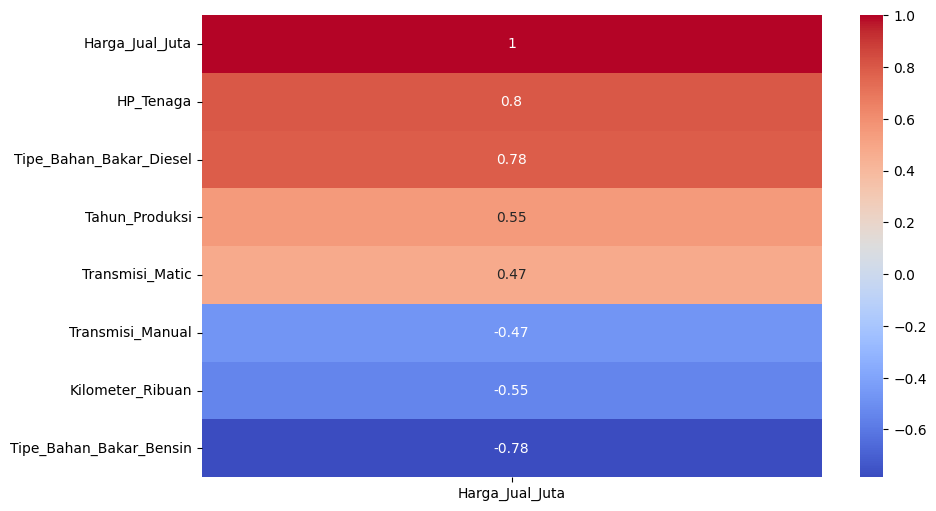

In [123]:
plt.figure(figsize=(10, 5))

#menghitung korelasi semua kolom
correlation_matrix = one_hot.corr()

#menggambar
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix['Harga_Jual_Juta'].sort_values(ascending=False).to_frame(), annot=True, cmap='coolwarm')